## Google Play Store apps and reviews

In [1]:
import pandas as pd
apps_with_duplicates = pd.read_csv('D:/Datasets/Android app market on google play/apps.csv')
apps = apps_with_duplicates.drop_duplicates()
print('Total number of apps in the dataset = ', apps)
print(apps.info())
n = 5
apps.sample(n)

Total number of apps in the dataset =        Unnamed: 0                                                App  \
0              0     Photo Editor & Candy Camera & Grid & ScrapBook   
1              1                                Coloring book moana   
2              2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3              3                              Sketch - Draw & Paint   
4              4              Pixel Draw - Number Art Coloring Book   
...          ...                                                ...   
9654       10836                                   Sya9a Maroc - FR   
9655       10837                   Fr. Mike Schmitz Audio Teachings   
9656       10838                             Parkinson Exercices FR   
9657       10839                      The SCP Foundation DB fr nn5n   
9658       10840      iHoroscope - 2018 Daily Horoscope & Astrology   

                 Category  Rating  Reviews  Size     Installs  Type Price  \
0          ART_AND_DESIGN     4

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1846,2345,LabCorp | Patient,MEDICAL,3.6,27,28.0,"10,000+",Free,0,Everyone,Medical,"April 19, 2018",1.0.0,4.1 and up
2763,3497,7 Weeks - Habit & Goal Tracker,PRODUCTIVITY,4.4,6011,4.3,"500,000+",Free,0,Everyone,Productivity,"December 19, 2015",3.2.1,4.1 and up
8911,10071,How To Get Your Ex Back Fast,LIFESTYLE,4.0,22,19.0,"5,000+",Free,0,Everyone,Lifestyle,"February 7, 2018",15,4.0.3 and up
8454,9585,PlayTexas Hold'em Poker Free,GAME,3.8,3543,NaN,"1,000,000+",Free,0,Teen,Card,"March 10, 2018",Varies with device,Varies with device
6697,7756,iReadMe,PRODUCTIVITY,5.0,8,22.0,100+,Free,0,Everyone,Productivity,"March 6, 2018",1.5,4.4 and up


## Data cleaning

In [2]:
chars_to_remove = ['+', ',', '$']
cols_to_clean = ['Installs', 'Price']
for col in cols_to_clean:
    for char in chars_to_remove:
        apps[col] = apps[col].astype(str).str.replace(char, "")
    apps[col] = pd.to_numeric(apps[col])

## Exploring app categories

In [3]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)
num_apps_in_category = apps['Category'].value_counts().sort_values(ascending = False)
data = [go.Bar(x = num_apps_in_category.index,y = num_apps_in_category.values,)]
plotly.offline.iplot(data)

Number of categories =  33


In [4]:
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)
data = [go.Histogram(x = apps['Rating'])]
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]}

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.173243045387998


## Size and price of an app

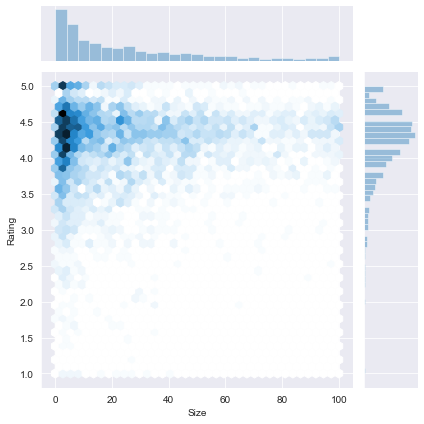

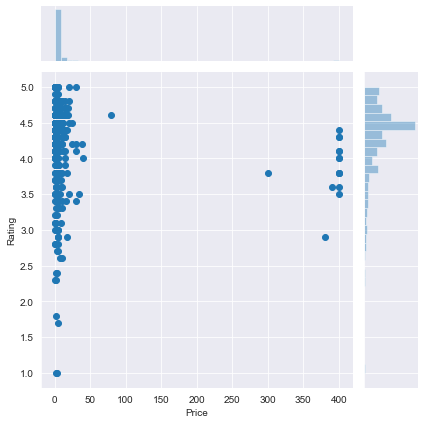

In [5]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")
apps_with_size_and_rating_present = apps[(~apps['Rating'].isnull()) & (~apps['Size'].isnull())]
large_categories = apps_with_size_and_rating_present.groupby('Category').filter(lambda x: len(x) >= 250).reset_index()
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'], kind = 'hex')
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

## Relation between app category and app price

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


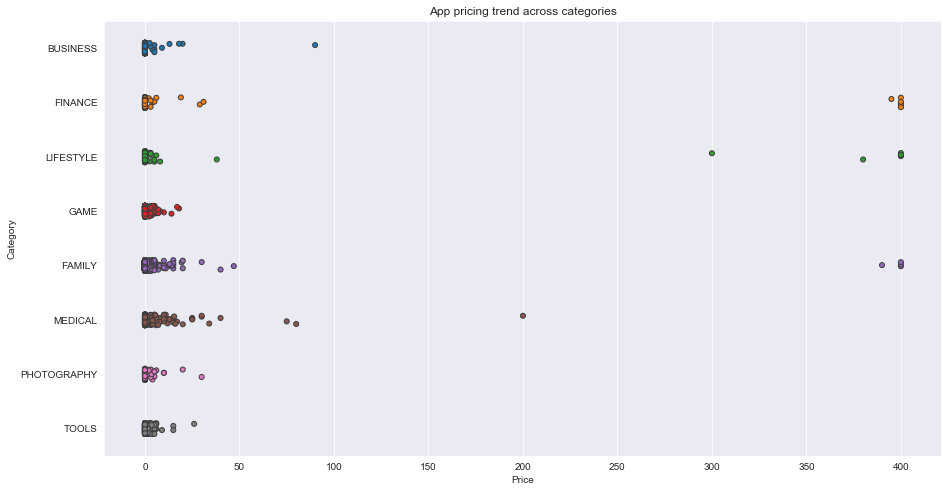

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY','MEDICAL', 'TOOLS', 'FINANCE','LIFESTYLE','BUSINESS'])]
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')
apps_above_200 = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats['Price'] > 200]
apps_above_200

## Filter out "junk" apps

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

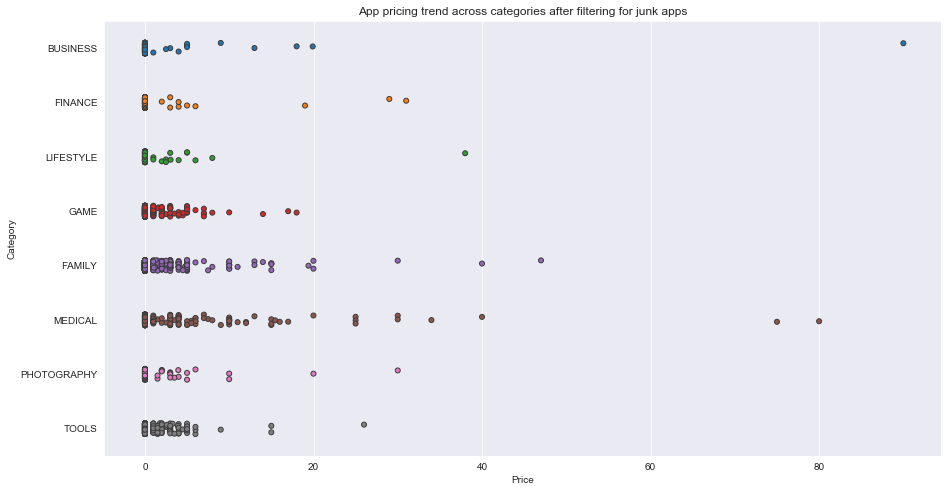

In [7]:
apps_under_100 = popular_app_cats[popular_app_cats['Price']<100]
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax = sns.stripplot(x='Price', y='Category', data=apps_under_100,jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

## Popularity of paid apps vs free apps

In [8]:
trace0 = go.Box(y=apps[apps['Type'] == 'Paid']['Installs'],name = 'Paid')
trace1 = go.Box(y=apps[apps['Type'] == 'Free']['Installs'],name = 'Free')
layout = go.Layout(title = "Number of downloads of paid apps vs. free apps",yaxis = dict(type = 'log',autorange = True))
data = [trace0,trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

## Sentiment analysis of user reviews

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

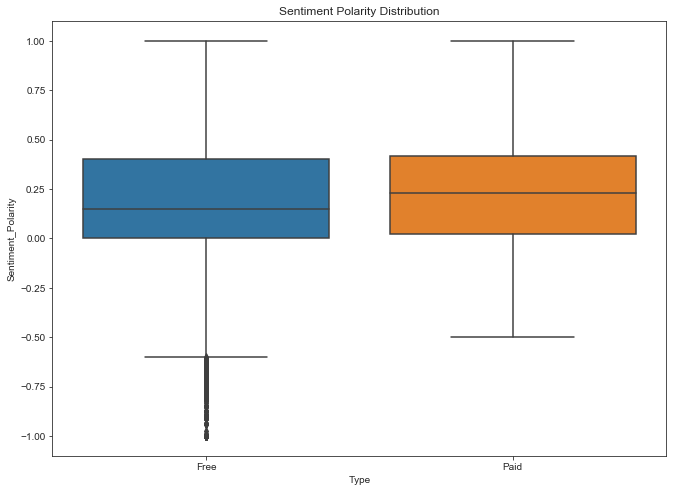

In [9]:
reviews_df = pd.read_csv('D:/Datasets/Android app market on google play/user_reviews.csv')
merged_df = pd.merge(apps, reviews_df, on = 'App', how = "inner")
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')